In [1]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import load_workload_data as ld
import load_benchmark_data as be
import matplotlib.pyplot as plt

In [2]:
# Init
sns.set()
sns.set(rc={'figure.figsize':(30,14)})
sns.set(font_scale=6.5)
plt.tight_layout()
workloads: Path = Path("../data/workloads/")

def plot_stacked(data: DataFrame, x: str, y: str, hue: str, hue_order: List[str]=None, order: List[str]=None, color=None):
    df_plottable: DataFrame = data.groupby([x, hue])[y].sum().reset_index().pivot(columns=hue, index=x, values=y)
    if hue_order:
        assert sorted(hue_order) == sorted(list(df_plottable))
        df_plottable = df_plottable[hue_order]
    if order:
        df_plottable = df_plottable.reindex(order)
    df_plottable.plot(kind="bar", stacked=True, ax=plt.gca(), rot=0)
    plt.ylabel(y)

def plot_workload(workload_folder: Path):
    df = ld.get_workload_data(workload_folder)
    x_order: List[str] = sorted(df[ld.DATA_TYPE].drop_duplicates(), reverse=True)
    order: List[str] = ["TABLE_SCAN", "JOIN", "AGGREGATE", "PROJECTION"]
    order_filtered = [operator for operator in order if operator in list(df[ld.OPERATOR_TYPE])]
    plot_stacked(data=df, x=ld.DATA_TYPE, y=ld.RUNTIME_S, hue=ld.OPERATOR_TYPE, hue_order=order_filtered, order=x_order)

<Figure size 2160x1008 with 0 Axes>

Processing table_scans
Processing projections
Processing aggregates
Processing joins


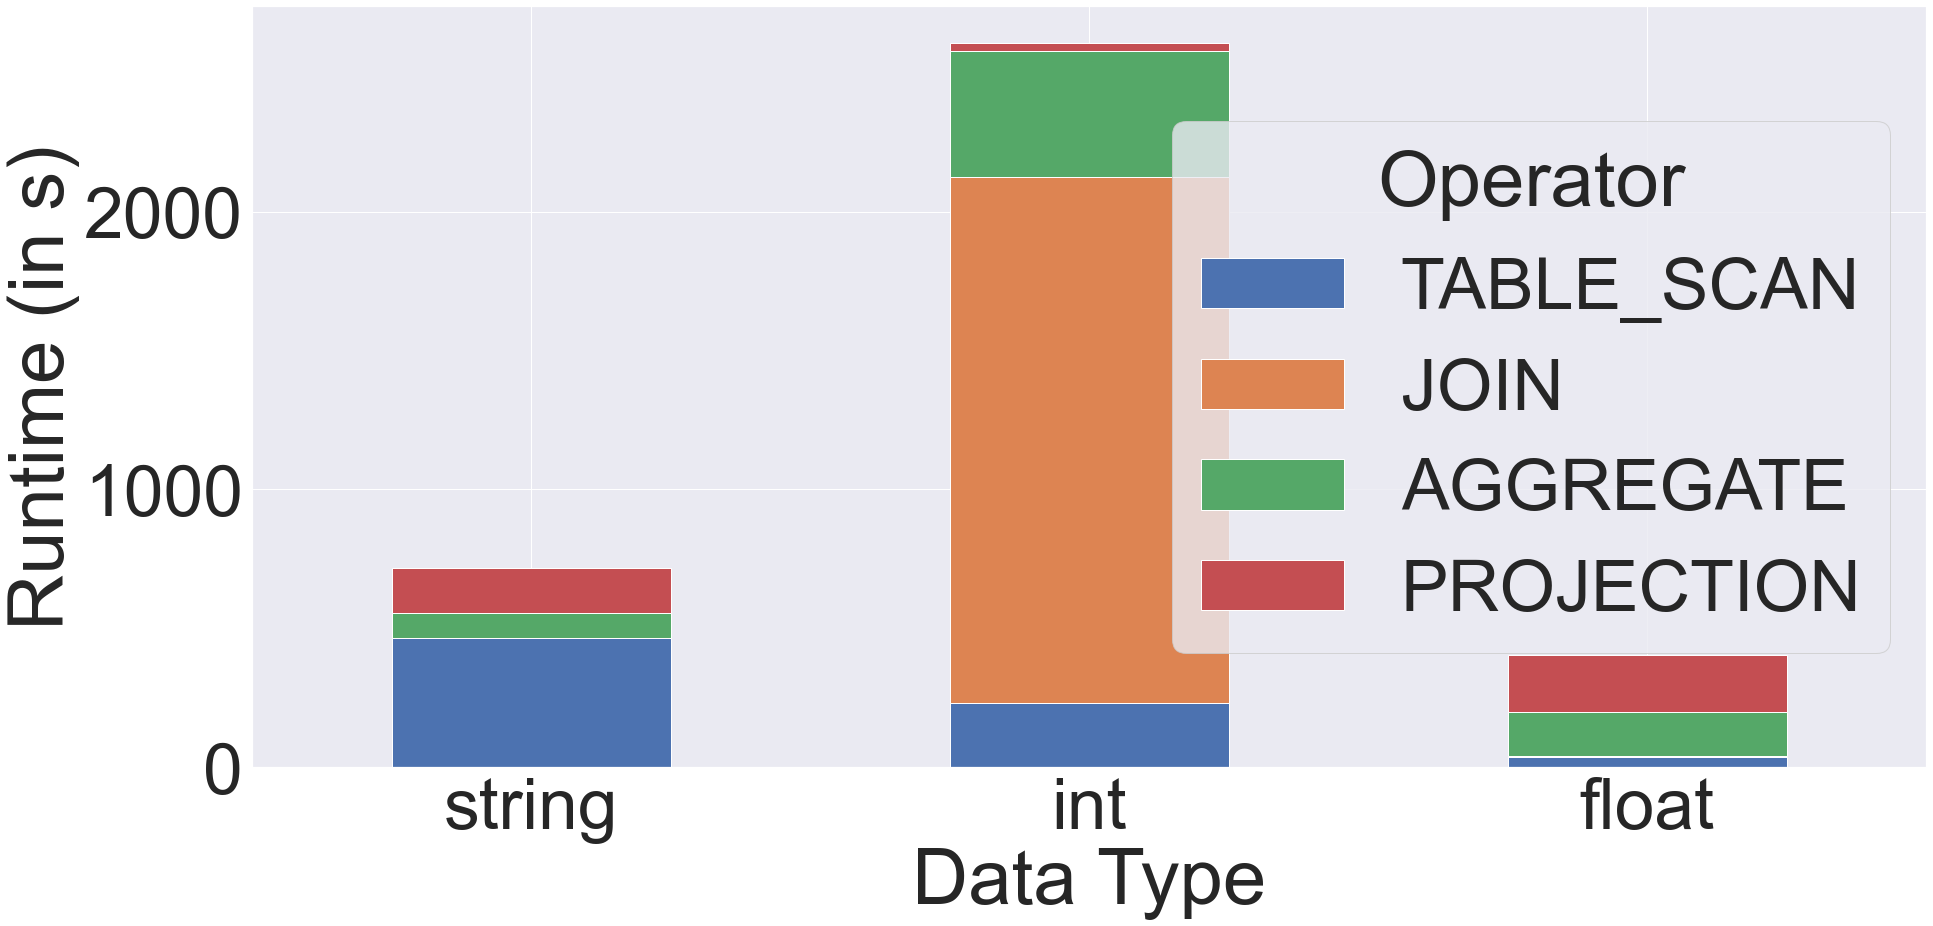

In [3]:
test = plot_workload(workloads / "TPC-H")
plt.savefig("visualizations/tpch-workload.svg", bbox_inches = "tight")

Processing table_scans
Processing projections
Processing aggregates
Processing joins


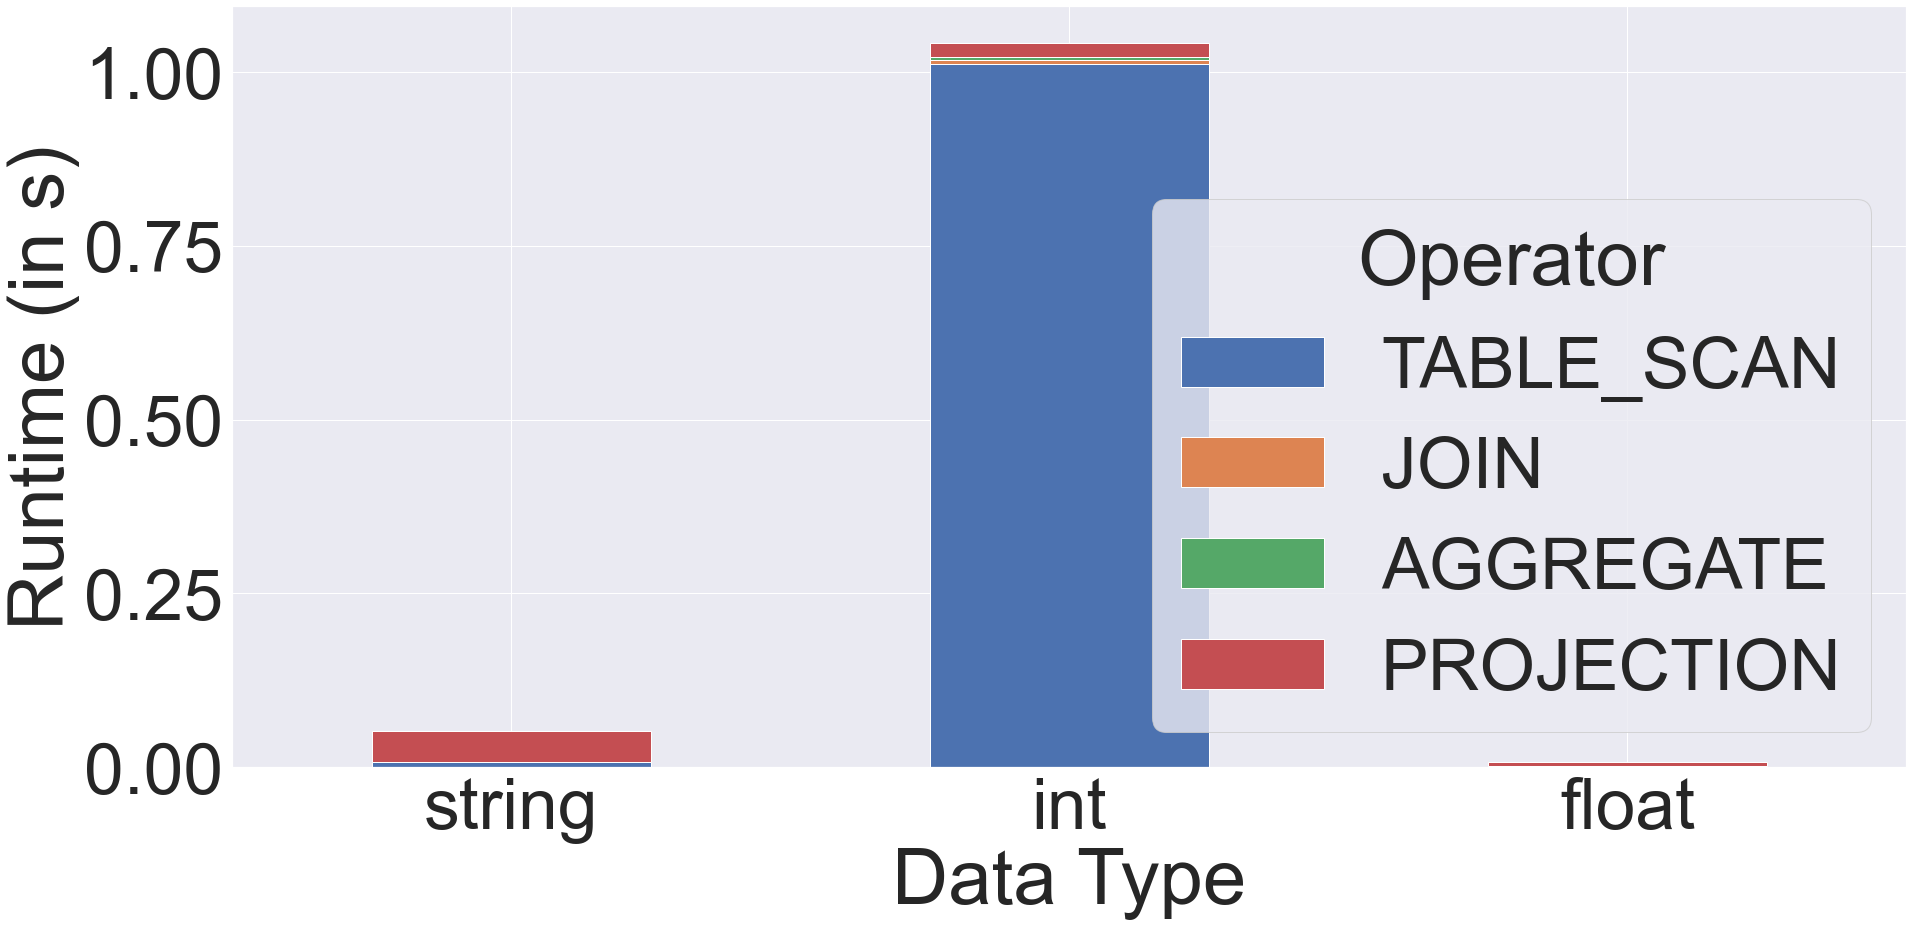

In [4]:
plot_workload(workloads / "TPC-C")

Processing table_scans
Processing projections
Processing aggregates
Processing joins


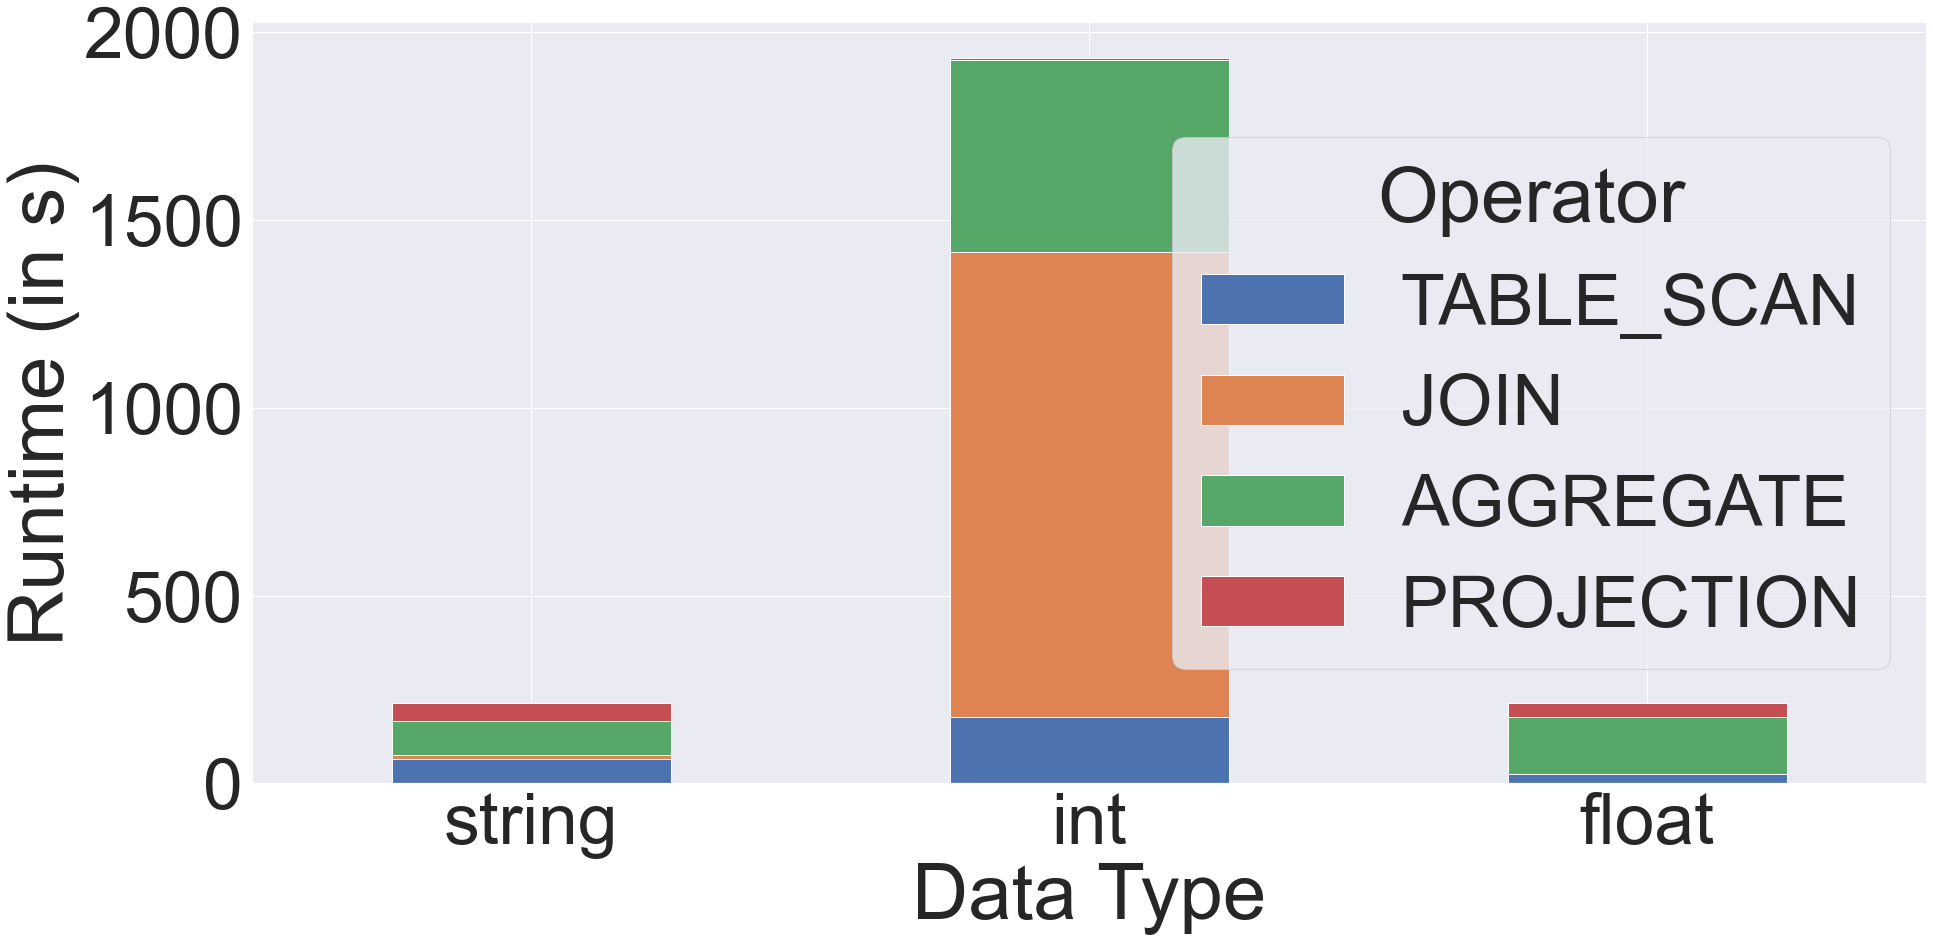

In [5]:
plot_workload(workloads / "TPC-DS")
plt.savefig("visualizations/tpcds-workload.svg", bbox_inches = "tight")

Processing table_scans
Processing projections
Processing aggregates
Processing joins


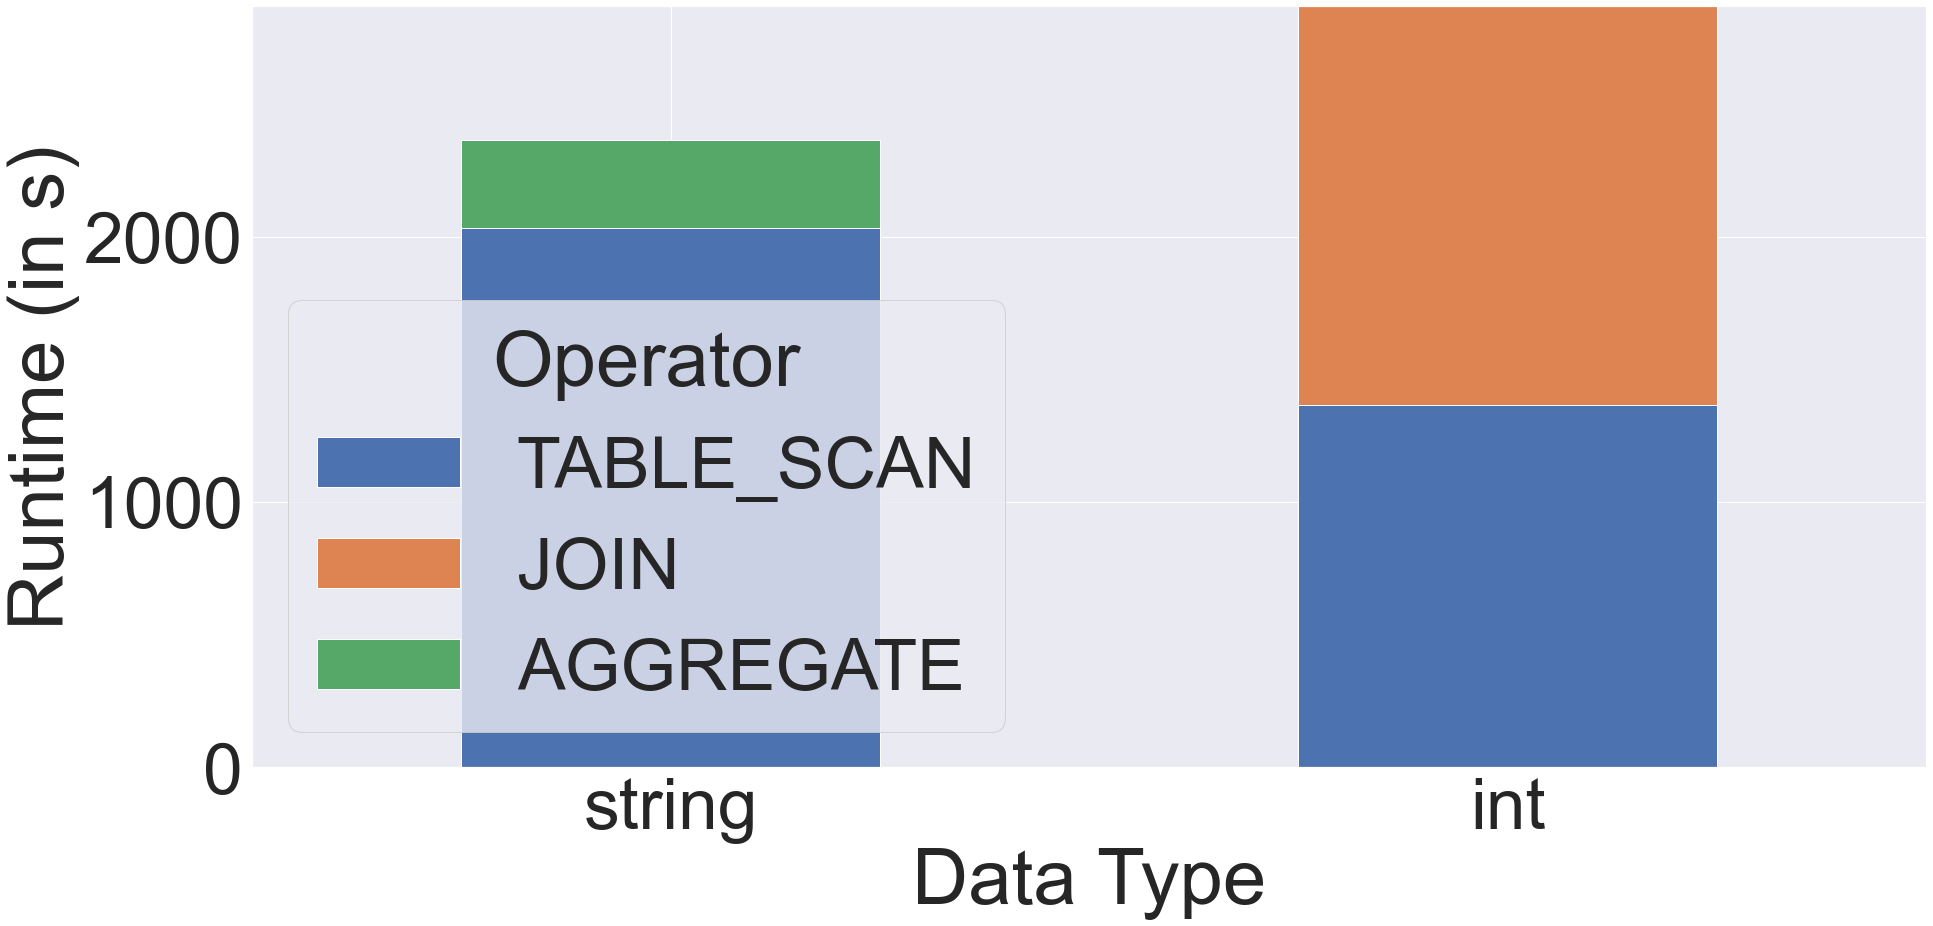

In [6]:
plot_workload(workloads / "Join Order Benchmark")
plt.savefig("visualizations/jo_workload.svg", bbox_inches = "tight")

Processing table_scans
Processing projections
Processing aggregates
Processing joins


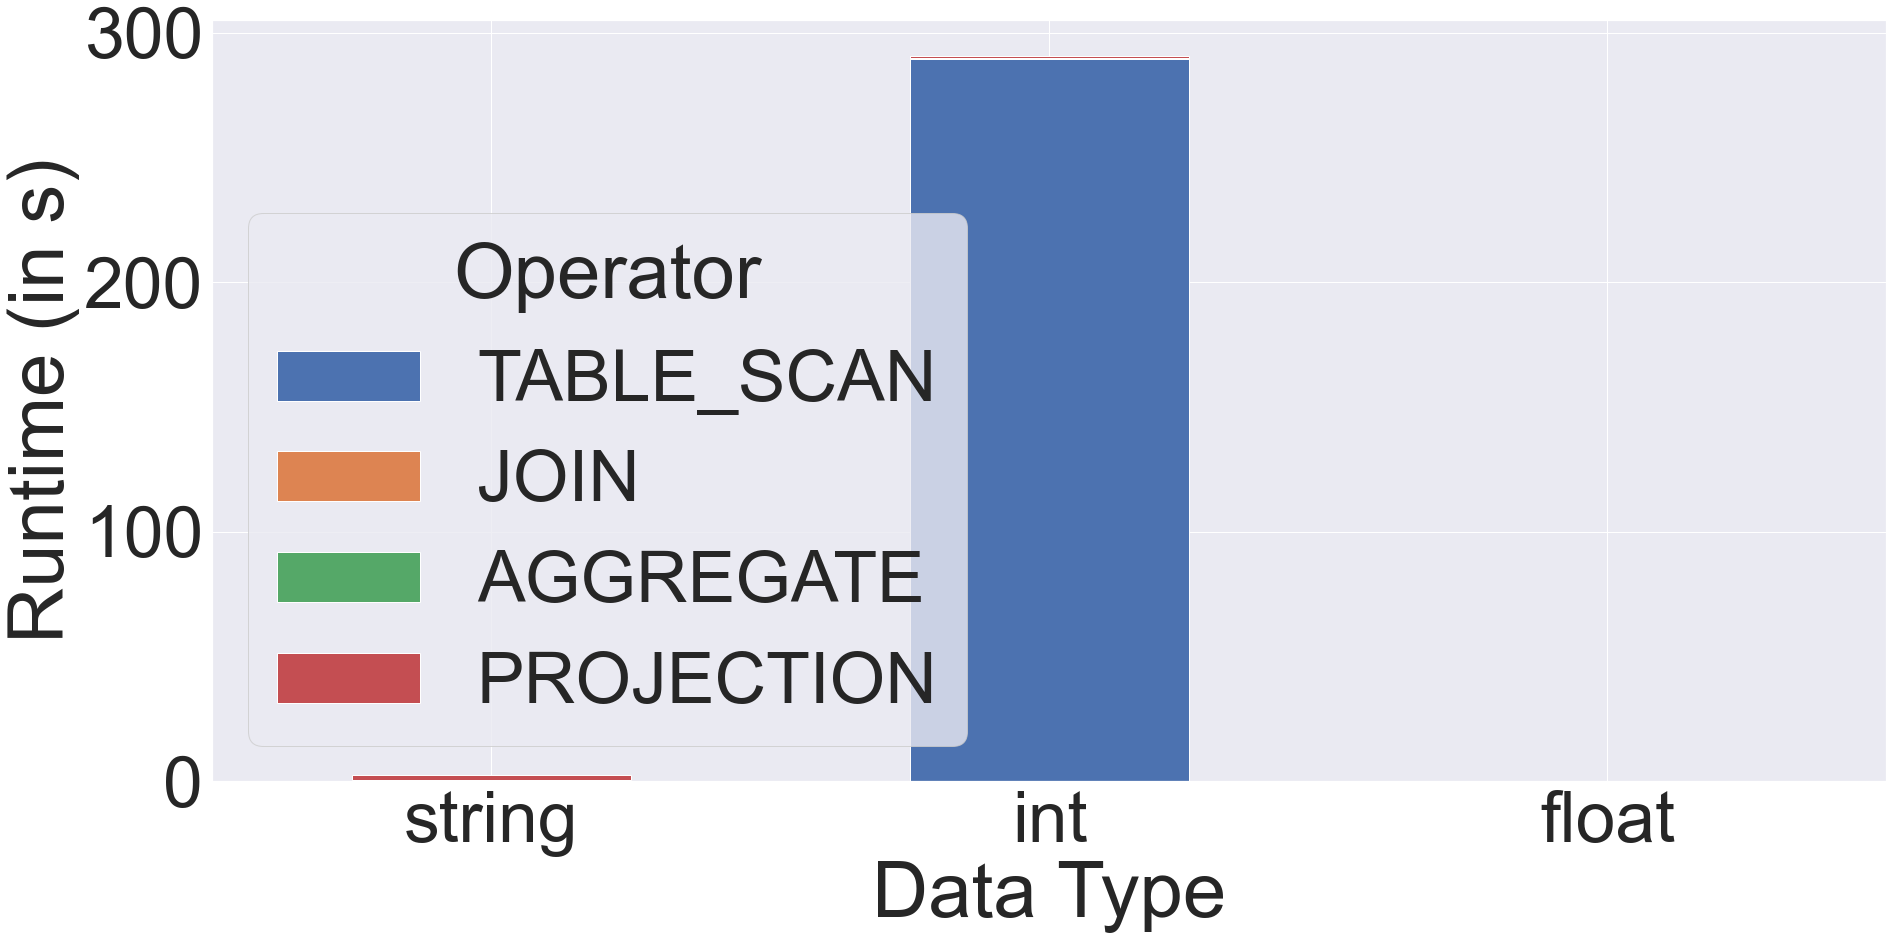

In [7]:
plot_workload(workloads / "CH-benCHmark")

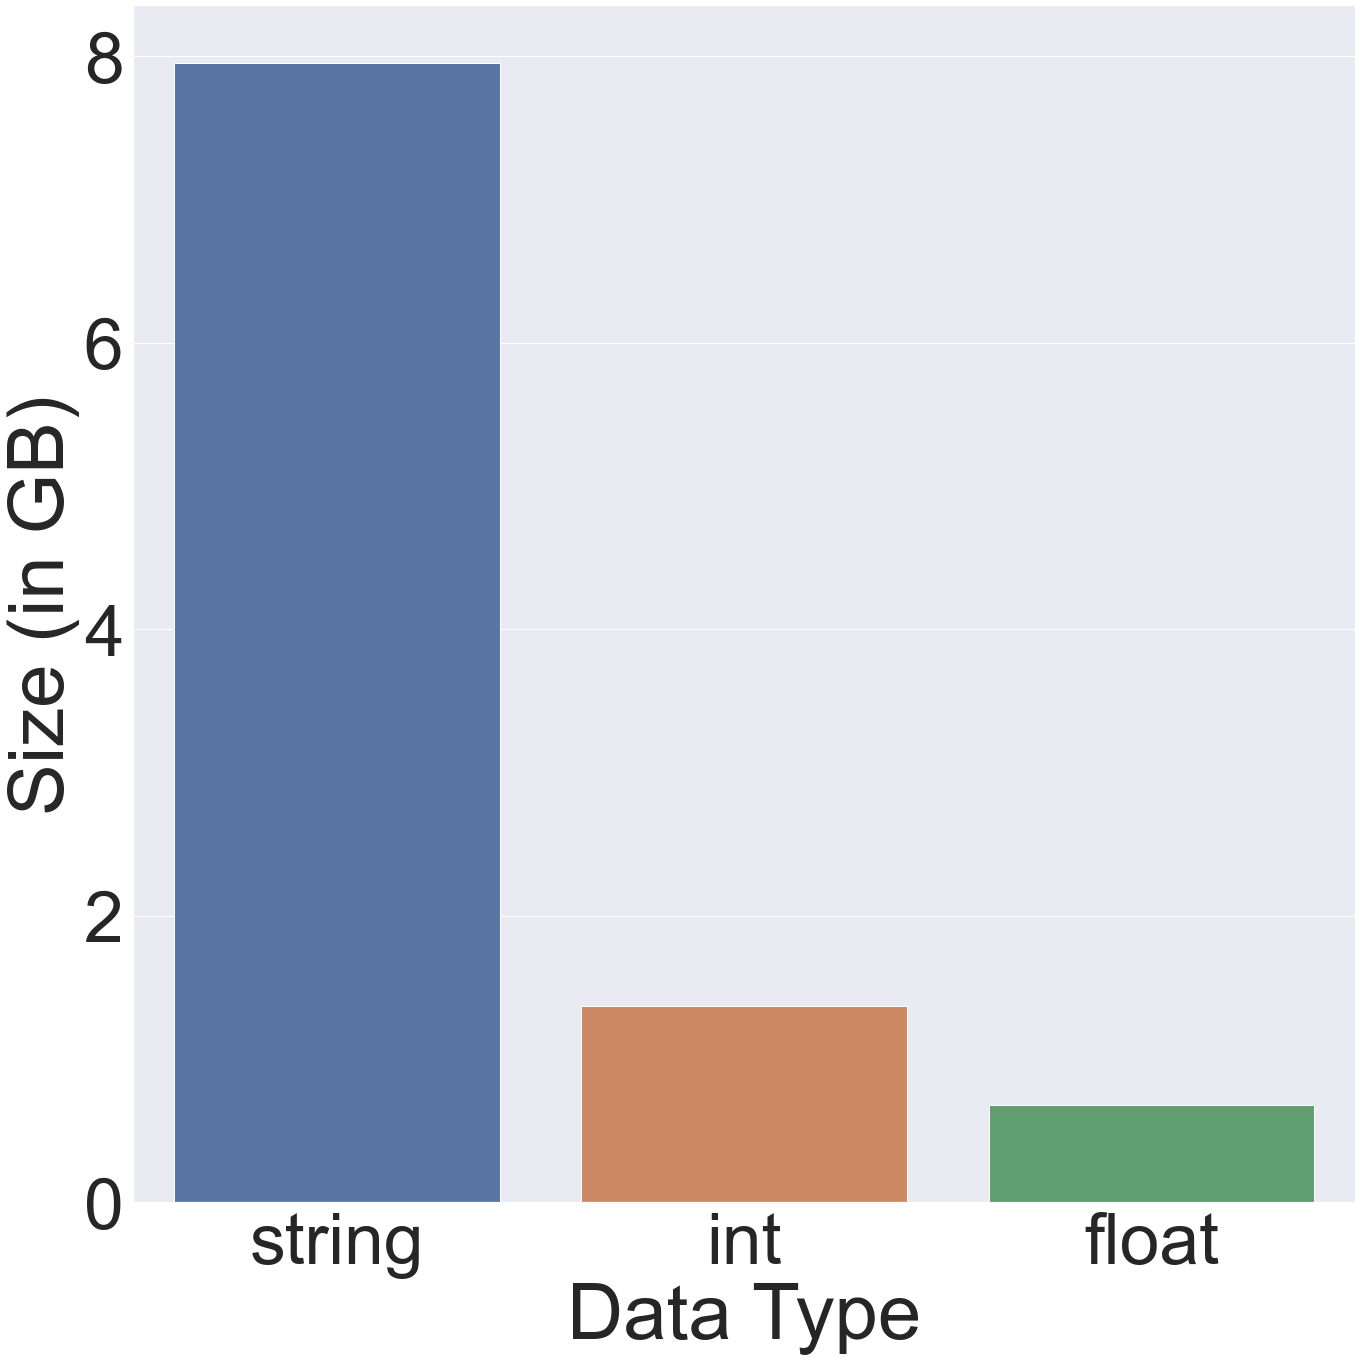

In [8]:
def plot_sizes(sizes_file: Path, benchmark_name: str):
    sizes: DataFrame = be.load_sizes(sizes_file)
    accumulated: DataFrame = sizes.groupby([be.DATA_TYPE], as_index=False)[be.SIZE_IN_GB].sum()
    x_order: List[str] = sorted(accumulated[be.DATA_TYPE], reverse=True)
    sns.catplot(data=accumulated, x=be.DATA_TYPE, y=be.SIZE_IN_GB, kind="bar", order=x_order, height=20)
    plt.savefig(f"visualizations/sizes_{benchmark_name}.svg", bbox_inches = "tight")
plot_sizes(Path("../data/tpch_singlethreaded/sizes_Dictionary.txt"), "tpch")

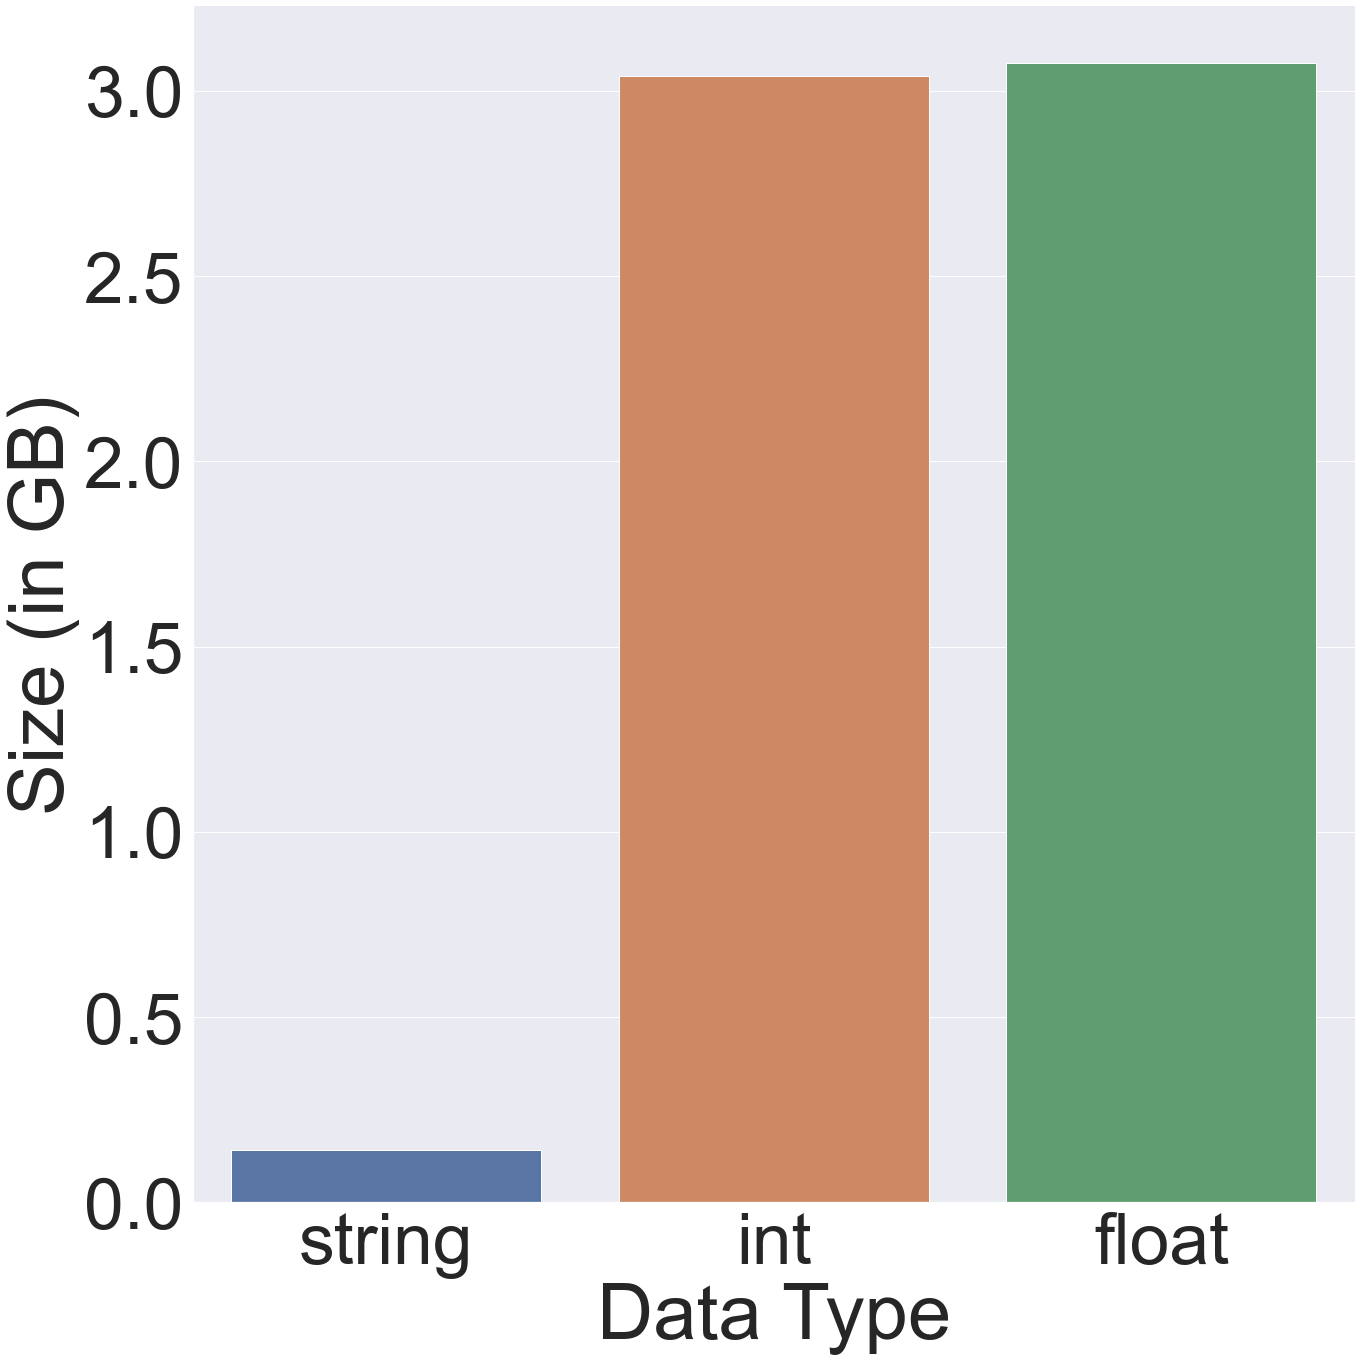

In [9]:
plot_sizes(Path("../data/tpcds_singlethreaded/sizes_Dictionary.txt"), "tpcds")

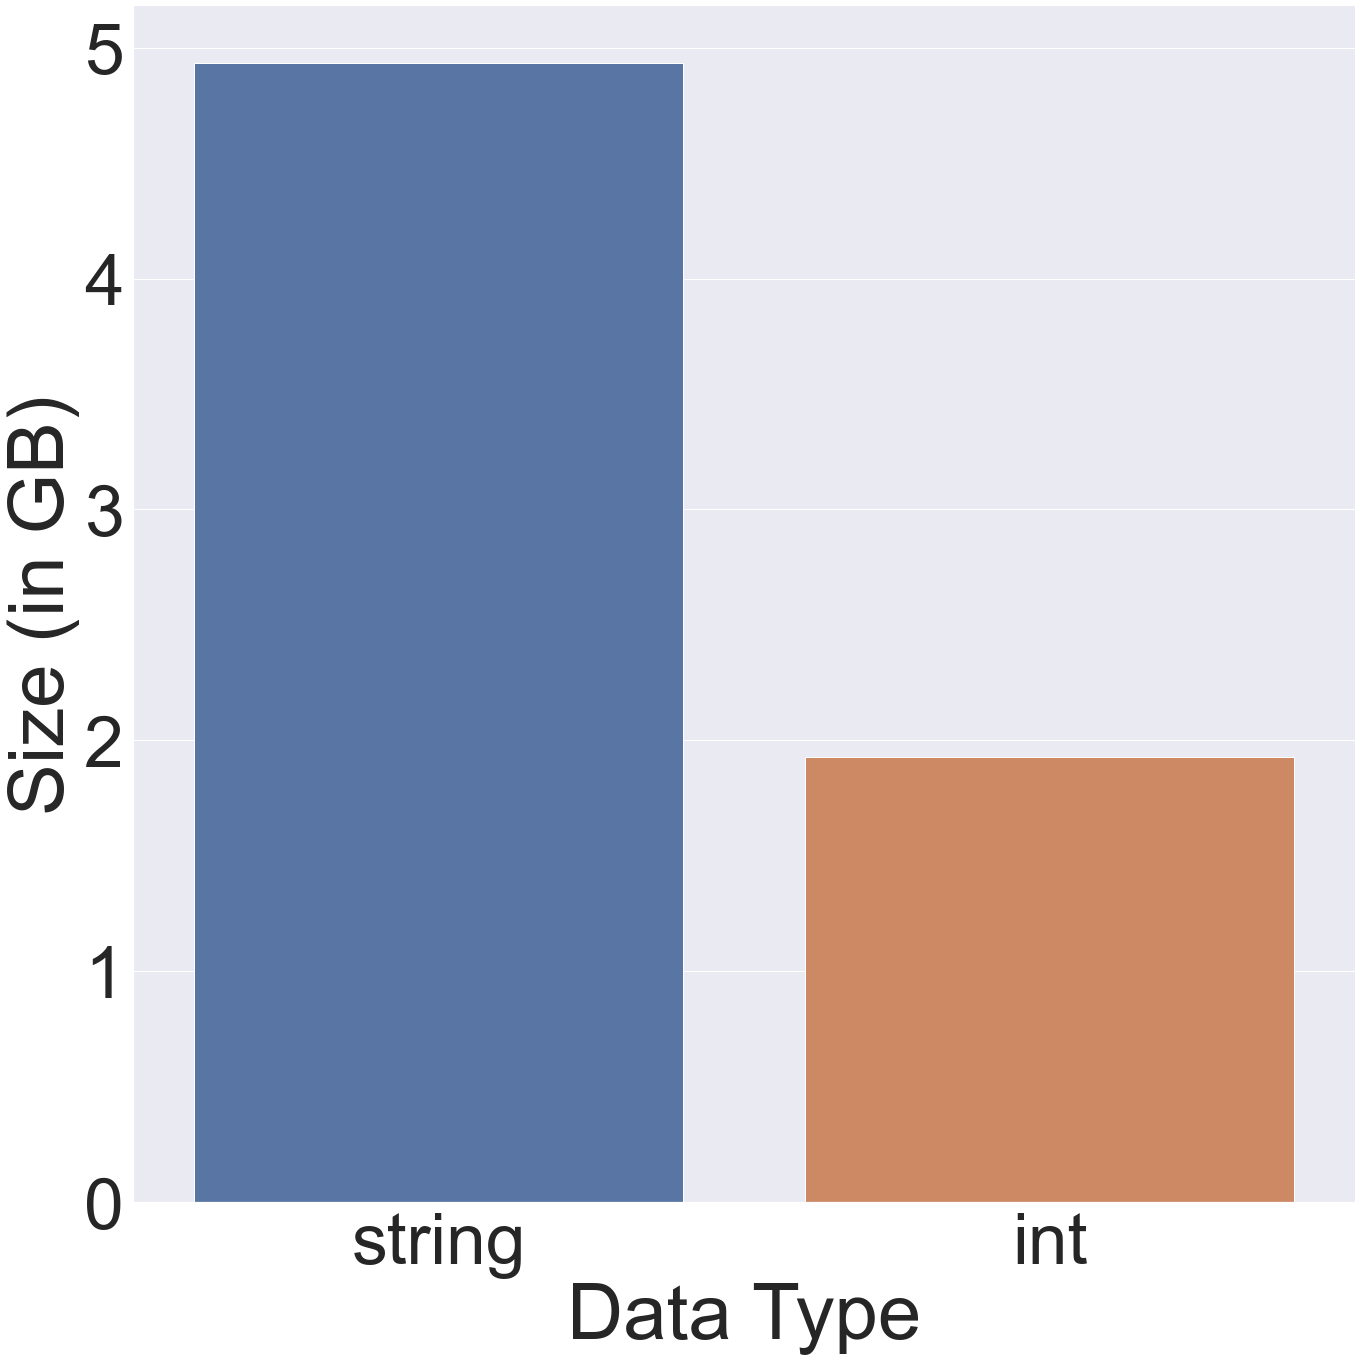

In [10]:
plot_sizes(Path("../data/jo_singlethreaded/sizes_Dictionary.txt"), "jo")


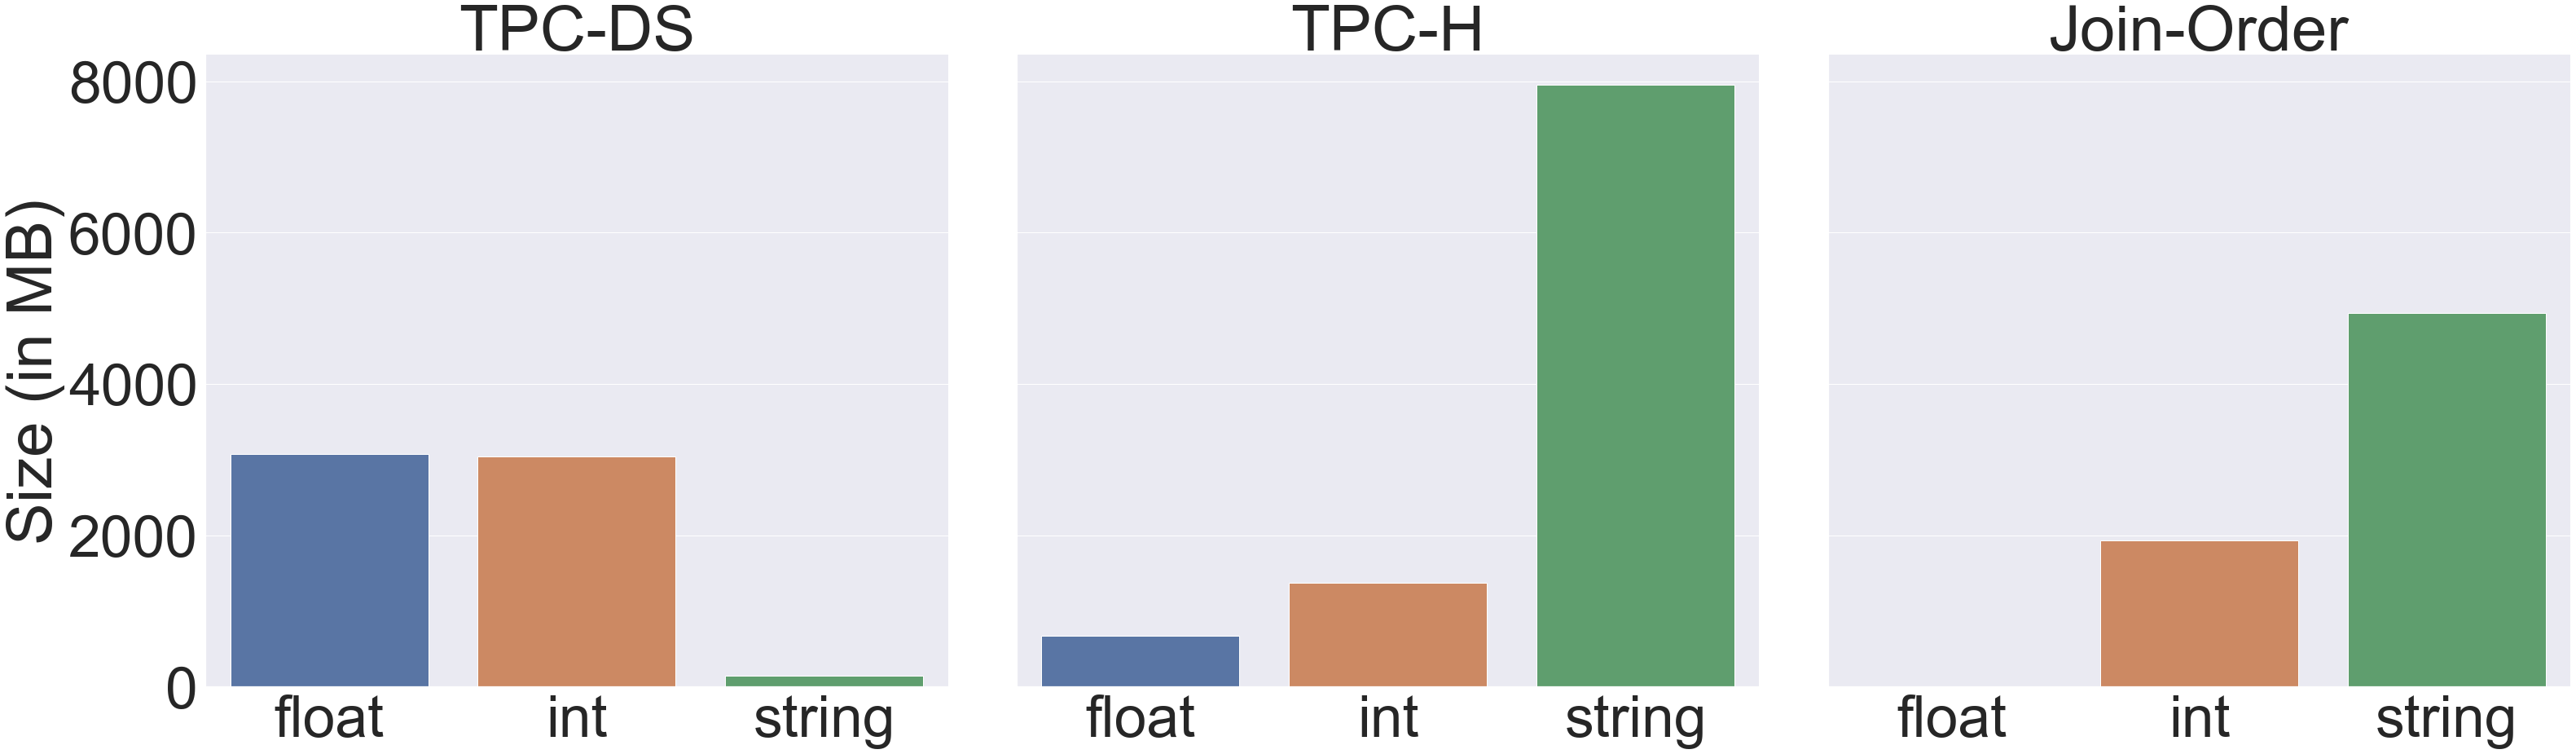

In [11]:
tpch: DataFrame = be.load_sizes(Path("../data/tpch_singlethreaded/sizes_Dictionary.txt"))
tpcds: DataFrame = be.load_sizes(Path("../data/tpcds_singlethreaded/sizes_Dictionary.txt"))
jo: DataFrame = be.load_sizes(Path("../data/jo_singlethreaded/sizes_Dictionary.txt"))

tpch["Benchmark"] = ["TPC-H" for i in range(0,len(tpch))]
tpcds["Benchmark"] = ["TPC-DS" for i in range(0,len(tpcds))]
jo["Benchmark"] = ["Join-Order" for i in range(0,len(jo))]
combined: DataFrame = tpch.append(tpcds).append(jo)
accumulated: DataFrame = combined.groupby([be.DATA_TYPE, "Benchmark"], as_index=False)[be.SIZE_IN_GB].sum()
x_order: List[str] = sorted(accumulated[be.DATA_TYPE], reverse=True)
accumulated["Size (in MB)"] = [size * 1000 for size in accumulated[be.SIZE_IN_GB]]
g = sns.catplot(data=accumulated, x=be.DATA_TYPE, y="Size (in MB)", kind="bar", col="Benchmark", height=15)
g.set_titles(col_template="{col_name}")
g.set_xlabels("")
plt.savefig("visualizations/sizes.svg", bbox_inches = "tight")

In [12]:
tpch_work: DataFrame = ld.get_workload_data(workloads / "TPC-H")
tpcds_work: DataFrame = ld.get_workload_data(workloads / "TPC-DS")
jo_work: DataFrame = ld.get_workload_data(workloads / "Join Order Benchmark")

Processing table_scans
Processing projections
Processing aggregates
Processing joins
Processing table_scans
Processing projections
Processing aggregates
Processing joins
Processing table_scans
Processing projections
Processing aggregates
Processing joins


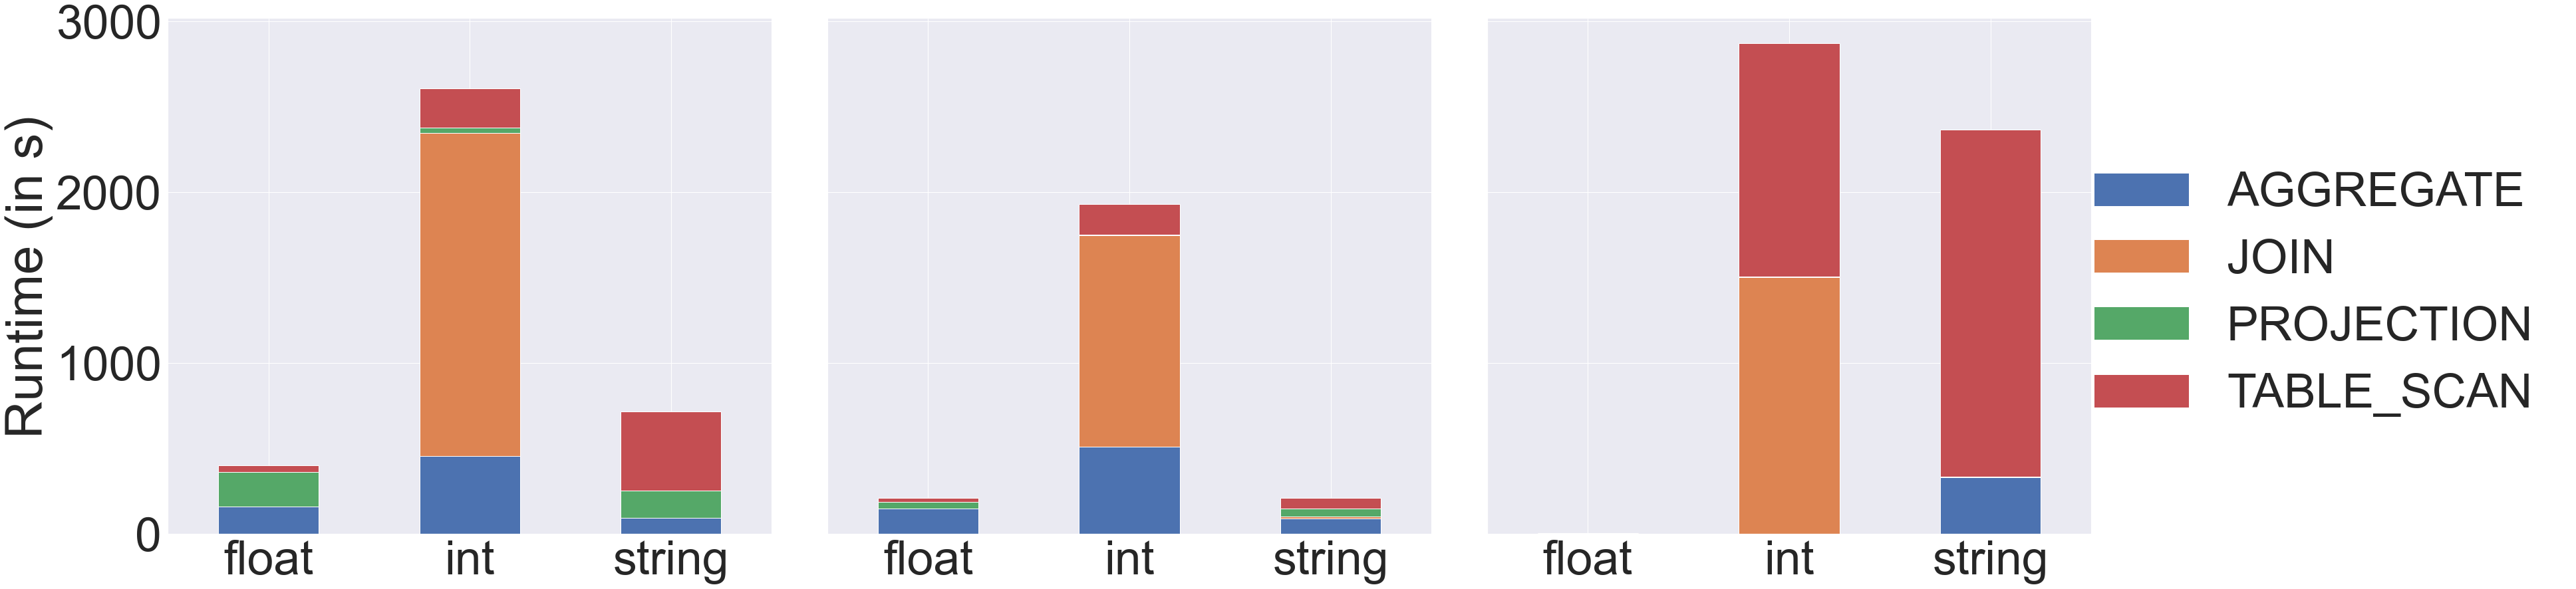

In [13]:
combined: DataFrame = tpch_work.append(tpcds_work).append(jo_work)
combined = combined.append({be.DATA_TYPE: "float", "WORKLOAD":"Join Order Benchmark", ld.RUNTIME_S:1, ld.OPERATOR_TYPE: "JOIN"}, ignore_index=True)
combined = combined.append({be.DATA_TYPE: "float", "WORKLOAD":"Join Order Benchmark", ld.RUNTIME_S: 1, ld.OPERATOR_TYPE: "TABLE_SCAN"}, ignore_index=True)
combined = combined.append({be.DATA_TYPE: "float", "WORKLOAD":"Join Order Benchmark", ld.RUNTIME_S: 1, ld.OPERATOR_TYPE: "AGGREGATE"}, ignore_index=True)
combined = combined.append({be.DATA_TYPE: "float", "WORKLOAD":"Join Order Benchmark", ld.RUNTIME_S: 1, ld.OPERATOR_TYPE: "PROJECTION"}, ignore_index=True)
combined = combined.append({be.DATA_TYPE: "int", "WORKLOAD":"Join Order Benchmark", ld.RUNTIME_S: 1, ld.OPERATOR_TYPE: "JOIN"}, ignore_index=True)
combined = combined.append({be.DATA_TYPE: "int", "WORKLOAD":"Join Order Benchmark", ld.RUNTIME_S: 1, ld.OPERATOR_TYPE: "TABLE_SCAN"}, ignore_index=True)
combined = combined.append({be.DATA_TYPE: "int", "WORKLOAD":"Join Order Benchmark", ld.RUNTIME_S: 1, ld.OPERATOR_TYPE: "AGGREGATE"}, ignore_index=True)
combined = combined.append({be.DATA_TYPE: "int", "WORKLOAD":"Join Order Benchmark", ld.RUNTIME_S: 1, ld.OPERATOR_TYPE: "PROJECTION"}, ignore_index=True)
combined = combined.append({be.DATA_TYPE: "string", "WORKLOAD":"Join Order Benchmark", ld.RUNTIME_S: 1, ld.OPERATOR_TYPE: "JOIN"}, ignore_index=True)
combined = combined.append({be.DATA_TYPE: "string", "WORKLOAD":"Join Order Benchmark", ld.RUNTIME_S: 1, ld.OPERATOR_TYPE: "TABLE_SCAN"}, ignore_index=True)
combined = combined.append({be.DATA_TYPE: "string", "WORKLOAD":"Join Order Benchmark", ld.RUNTIME_S: 1, ld.OPERATOR_TYPE: "AGGREGATE"}, ignore_index=True)
combined = combined.append({be.DATA_TYPE: "string", "WORKLOAD":"Join Order Benchmark", ld.RUNTIME_S: 1, ld.OPERATOR_TYPE: "PROJECTION"}, ignore_index=True)
g = sns.FacetGrid(combined, col="WORKLOAD", height=15)
g.map_dataframe(plot_stacked, x=ld.DATA_TYPE, y=ld.RUNTIME_S, hue=ld.OPERATOR_TYPE)
g.set_titles(col_template="")
g.set_ylabels(ld.RUNTIME_S)
g.add_legend()
plt.savefig("visualizations/workload.svg", bbox_inches = "tight")